<a href="https://colab.research.google.com/github/abdulquawiyy-owolabi/Deep-Learning/blob/main/Stochastic_Gradient_Descent_(SGD)_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
from torch import nn
from math import pi
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
def fun_z(x,y):
  z = np.sin(x**2 + y**2)
  return z

def fun_dz(x,y):
  dz_dx = 2*x*np.cos(x**2 + y**2)
  dz_dy = 2*y*np.cos(x**2 + y**2)
  return dz_dx, dz_dy

In [ ]:
def plot_ex(fun1, fun2):

  #plot the function and the gradient vectors
  x = np.linspace(-1, 1, 100)
  y = np.linspace(-1, 1, 100)
  X, Y = np.meshgrid(x, y)
  Z = fun1(X, Y)
  dz_dx, dz_dy = fun2(X, Y)
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(X, Y, Z, cmap='viridis')

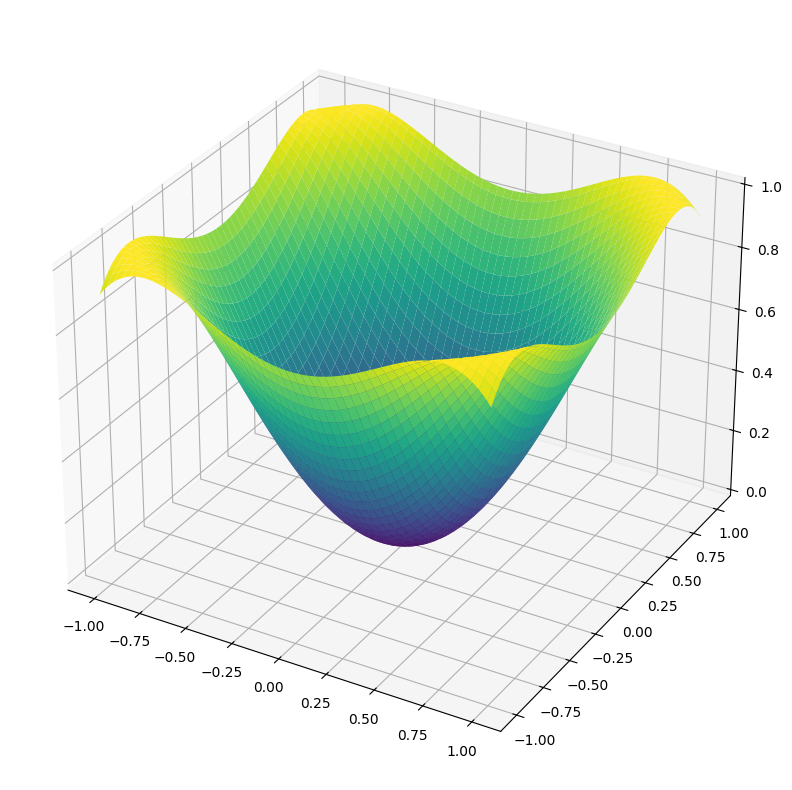

In [ ]:
plot_ex(fun_z, fun_dz)

In [ ]:
class SimpleGraph:

  def __init__(self, w, b):
    assert isinstance(w, float)
    assert isinstance(b, float)
    self.w = torch.tensor([w], requires_grad=True)
    self.b = torch.tensor([b], requires_grad=True)

  def forward(self, x):
    assert isinstance(x, torch.Tensor)
    prediction = torch.tanh(x*self.w+self.b)
    return prediction

  def sq_loss(y_true,  y_prediction):
    assert isinstance(y_true, torch.Tensor)
    assert isinstance(y_prediction, torch.Tensor)
    loss = (y_true - y_prediction)**2
    return loss

In [ ]:
feature = torch.tensor([1])
target = torch.tensor([7])

simple_graph = SimpleGraph(-0.5, 0.5)
prediction = simple_graph.forward(feature)
loss = SimpleGraph.sq_loss(target, prediction)
print(loss)

tensor([49.], grad_fn=<PowBackward0>)


In [ ]:
a = torch.tensor([1., 0.], requires_grad=True)
b = torch.tensor([2., 1.], requires_grad=True)
c  = a +b
print(f"Gradient function = {c.grad_fn}")

Gradient function = <AddBackward0 object at 0x7ece6d69a170>


In [ ]:
ana_dlos_dw = -2 * feature * (target -prediction.detach()) * (1-prediction.detach()**2)
print(f"Analytical dlos/dw = {ana_dlos_dw}")
ana_dlos_db = -2 * (target -prediction.detach()) * (1-prediction.detach()**2)
print(f"Analytical dlos/db = {ana_dlos_db}")

loss.backward()
autograd_dlos_dw = simple_graph.w.grad
autograd_dlos_db = simple_graph.b.grad

print(ana_dlos_db == autograd_dlos_db)
print(ana_dlos_dw == autograd_dlos_dw)

Analytical dlos/dw = tensor([-14.])
Analytical dlos/db = tensor([-14.])
tensor([True])
tensor([True])


# Training Loop in PyTorch

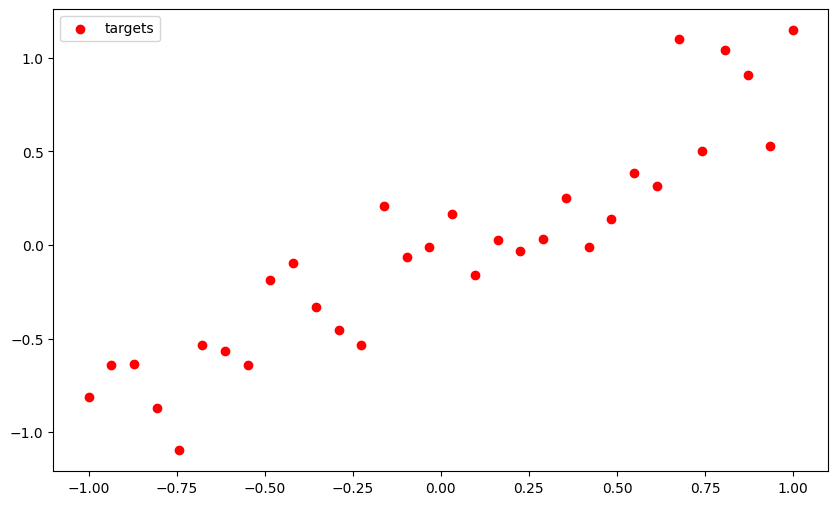

In [ ]:
n_sample = 32
inputs = torch.linspace(-1.0, 1.0, n_sample).reshape(n_sample,1)
noise = torch.randn(n_sample, 1) / 4
targets = torch.sin(inputs) + noise
plt.figure(figsize=(10, 6))
plt.scatter(inputs, targets, c='r', label='targets')
plt.legend()
plt.show()

In [ ]:
class WideNet(nn.Module):
  def __init__(self):
    n_cells = 512
    super().__init__()
    self.layers  = nn.Sequential(
        nn.Linear(1, n_cells),
        nn.Tanh(),
        nn.Linear(n_cells, 1))

  def forward(self, x):
      return self.layers(x)

In [ ]:
wide_net = WideNet()
print(wide_net)

WideNet(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=512, bias=True)
    (1): Tanh()
    (2): Linear(in_features=512, out_features=1, bias=True)
  )
)


In [ ]:
# ccreate MSE loss function
loss_function = nn.MSELoss()

# SGD optimizeer
lr = 00.003
sgd_optimizer = torch.optim.SGD(wide_net.parameters(),
                                lr=lr, momentum=0.9)

In [ ]:
# Reset all gradients to zero
sgd_optimizer.zero_grad()

# fforward pass
prediction  = wide_net(inputs)

# ccompute loss
loss = loss_function(prediction, targets)
print(f"Loss: {loss.item()}")

# backward pass
loss.backward()

# update parameters
sgd_optimizer.step()

Loss: 0.4098944365978241


In [ ]:
def train(feature, labels, model, loss_function, optimizer, epochs):
  losses = []
  for epoch in range(epochs):
    predictions = model(feature)
    loss = loss_function(predictions, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
  return losses

In [ ]:
epochs = 1847
losses = train(inputs, targets, wide_net, loss_function, sgd_optimizer, epochs)

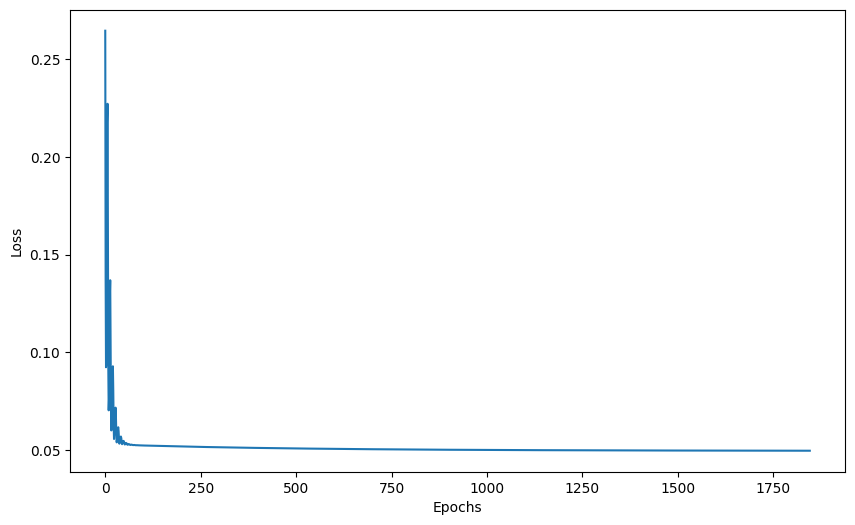

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()